# A quickstart of the GraphEM solver

**Expected time to run through: 3 mins**

This tutorial demonstrates a quickstart of the GraphEM solver.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as  plt
import GraphEM

In [2]:
np.set_printoptions(precision = 4) # set print forma

In [3]:
#Generate data
np.random.seed(42)
# Temperature
temp = np.random.rand(5,10).T   # 10 years, 5 grid points
target = np.copy(temp)
print("Original Temp:\n",temp)

temp[4:10,:] = np.nan  # Insert missing values after instrumental period

Original Temp:
 [[0.3745 0.0206 0.6119 0.6075 0.122 ]
 [0.9507 0.9699 0.1395 0.1705 0.4952]
 [0.732  0.8324 0.2921 0.0651 0.0344]
 [0.5987 0.2123 0.3664 0.9489 0.9093]
 [0.156  0.1818 0.4561 0.9656 0.2588]
 [0.156  0.1834 0.7852 0.8084 0.6625]
 [0.0581 0.3042 0.1997 0.3046 0.3117]
 [0.8662 0.5248 0.5142 0.0977 0.5201]
 [0.6011 0.4319 0.5924 0.6842 0.5467]
 [0.7081 0.2912 0.0465 0.4402 0.1849]]


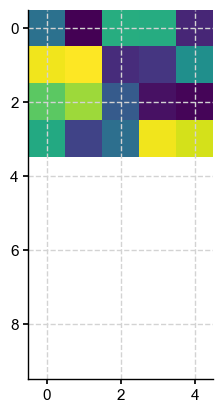

In [4]:
plt.imshow(temp)
plt.show()

In [5]:
# Proxies
proxy = np.random.rand(3,10).T # 10 years, 3 proxies

# calibration period
calib = range(0,4)
print("calib\n",calib)
G = GraphEM.solver.GraphEM()

calib
 range(0, 4)


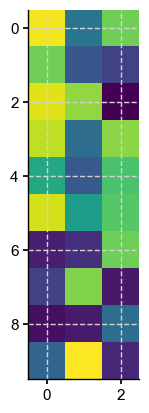

In [6]:
plt.imshow(proxy)
plt.show()

In [7]:
#Fit test
G.fit(temp,proxy,calib,sp_TT=3,sp_TP=3,sp_PP=3,graph_method = 'glasso')
temp_r = G.temp_r

Estimating graph using greedy search
Iter    TT      TP      PP

001  10.000   0.000   0.000
002  10.000  13.333   0.000
003  10.000  13.333   0.000
004  10.000  13.333   0.000
005  10.000  13.333   0.000
006  10.000  13.333   0.000
007  10.000  13.333   0.000
008  10.000  13.333   0.000
009  10.000  13.333   0.000
010  10.000  13.333   0.000
011  10.000  13.333   0.000
012  10.000  13.333   0.000
013  10.000  13.333   0.000
014  10.000  13.333  33.333
Running GraphEM:

Iter     dXmis     rdXmis

001     0.0544     0.1120
002     0.0742     0.1516
003     0.0347     0.0694
004     0.0175     0.0345
005     0.0089     0.0173
006     0.0045     0.0087
007     0.0023     0.0045


/Users/fzhu/Github/GraphEM/GraphEM/GraphEstimation.py:270: RuntimeWarning: invalid value encountered in reciprocal
  dinv = np.sqrt(d)**(-1)


In [8]:
print("Computing verification statistics\n")
V = GraphEM.solver.verif_stats(temp_r,target,calib)
print(V)
print("temp:\n",temp)
print("temp_r",temp_r)
print("proxy:\n",proxy)

Computing verification statistics

Mean MSE = 0.0832, Mean RE = -0.0908, Mean CE = -1.0142, Mean R2 = nan
temp:
 [[0.3745 0.0206 0.6119 0.6075 0.122 ]
 [0.9507 0.9699 0.1395 0.1705 0.4952]
 [0.732  0.8324 0.2921 0.0651 0.0344]
 [0.5987 0.2123 0.3664 0.9489 0.9093]
 [   nan    nan    nan    nan    nan]
 [   nan    nan    nan    nan    nan]
 [   nan    nan    nan    nan    nan]
 [   nan    nan    nan    nan    nan]
 [   nan    nan    nan    nan    nan]
 [   nan    nan    nan    nan    nan]]
temp_r [[0.3745 0.0206 0.6119 0.6075 0.122 ]
 [0.9507 0.9699 0.1395 0.1705 0.4952]
 [0.732  0.8324 0.2921 0.0651 0.0344]
 [0.5987 0.2123 0.3664 0.9489 0.9093]
 [0.6632 0.2401 0.353  0.6908 0.3905]
 [0.6631 0.217  0.353  0.7117 0.3905]
 [0.663  0.173  0.3531 0.7514 0.3905]
 [0.6652 0.8992 0.3516 0.0956 0.3905]
 [0.6643 0.603  0.3522 0.3631 0.3905]
 [0.6651 0.8556 0.3517 0.1349 0.3905]]
proxy:
 [[0.9696 0.3887 0.7722]
 [0.7751 0.2713 0.1987]
 [0.9395 0.8287 0.0055]
 [0.8948 0.3568 0.8155]
 [0.5979 0.280

/Users/fzhu/Apps/miniconda3/envs/LMRt/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/fzhu/Apps/miniconda3/envs/LMRt/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


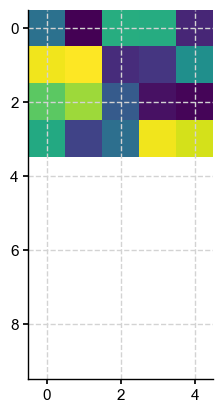

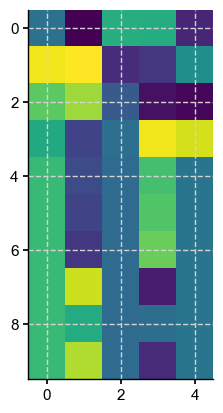

In [9]:
plt.imshow(temp)
plt.show()
plt.imshow(temp_r)
plt.show()